# 1. Introduction

## Machine Learning Project

### Name    : Muhammad Daffa  

***Project Background and Objectives:***  
As the streaming industry is becoming a very competitive industry. This project will create a model for predicting whether **StreamThis** costumers **will churn or not based on their customers' behaviors**. The **goal is to identify which customer are likely to churn**, so that the marketing division will have a strategy to prevent that customer in Churning. This project expected to identify 90% customer who are likely to churn with **recall metrics** to minimize miss predict actual churn

***Deployment URL***:  
https://huggingface.co/spaces/Muhammad-Daffa/StreamThis-Churn-Customer-Prediction

***Dataset:***  
The dataset is obtained from kaggle website. Each record in the training file represents a customer and includes features such as age, gender, tenure, usage frequency, support calls, payment delay, subscription type, contract length, total spend, and last interaction. The churn label indicates whether the customer has churned (1) or not (0)


https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data?select=customer_churn_dataset-training-master.csv

---

# 2. Import Libraries

In [1]:
import pandas as pd                     # Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from feature_engine.outliers import Winsorizer

import phik
from sklearn.metrics import recall_score,classification_report,ConfusionMatrixDisplay, classification_report, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")
import pickle

---

# 3. Data Loading

Information about the dataset:

- CustomerID    : A unique customer id
- Age           : Age of the customer
- Gender        : Gender of the customer
- Tenure        : Duration in months for which a customer has been using the company's products or services
- Usage Frequency   : Number of times that the customer used the company’s services in the last month
- Support Calls     : Number of calls to the customer support by customers per last month 
- Payment Delay     : Number of days that the customer has delayed their payment in the last month
- Subscription Type : Type of subscription
- Contract Length   : Duration of the contract
- Total Spend       : Total amount of money spent by the customers
- Last Interaction  : Number of days since the last interaction to the streaming service
- Churn         : Whether a customer has churned (1) or not (0)

In [2]:
# Load Dataset
df_ori = pd.read_csv('Milestone2_Daffa.csv', index_col = 0)
df = df_ori.copy()

In [3]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [4]:
# Show first 10 dataset
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [5]:
# Show last 10 dataset
df.tail(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
505197,64365.0,48.0,Female,36.0,22.0,4.0,22.0,Premium,Annual,342.0,9.0,1.0
505198,64366.0,26.0,Female,54.0,24.0,2.0,21.0,Basic,Annual,165.0,23.0,1.0
505199,64367.0,64.0,Male,30.0,27.0,9.0,28.0,Premium,Annual,884.0,21.0,1.0
505200,64368.0,51.0,Male,47.0,17.0,10.0,26.0,Basic,Annual,544.0,24.0,1.0
505201,64369.0,45.0,Male,3.0,1.0,5.0,11.0,Standard,Annual,218.0,15.0,1.0
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0
505206,64374.0,52.0,Female,45.0,15.0,9.0,25.0,Standard,Monthly,696.0,22.0,1.0


In [6]:
# Drop customer ID Column
df.drop('CustomerID', axis = 1, inplace = True)

In [7]:
# Check Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


From the information above, all numerical column is in float type. However, the nature for the value within the numerical column is integer. Thus, converting numerical type to int will be performed.  

For categorical column, such as Gender, Subscription Type and Contract Length are in object/string type  

Churn column will acted as the target / label in this project and already encoded to 0 dan 1

Checking the missing values and duplicated values

In [8]:
df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

The missing is categorized as MCAR. This is because there are no pattern in the missing data and the data is missing on all column.  

Because only there is only one missing value inside the dataset (500K+ rows), we need to drop the row that contain the missing value.  

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum().sum()

0

No more missing value inside the dataset

In [11]:
df.duplicated().sum()

0

There is also no duplicated data inside our dataset

In [12]:
# Check Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,505206.0,39.704172,12.670577,18.0,29.0,40.0,49.0,65.0
Tenure,505206.0,31.350435,17.237482,1.0,16.0,32.0,46.0,60.0
Usage Frequency,505206.0,15.714825,8.619323,1.0,8.0,16.0,23.0,30.0
Support Calls,505206.0,3.833317,3.133603,0.0,1.0,3.0,6.0,10.0
Payment Delay,505206.0,13.496843,8.451187,0.0,6.0,13.0,20.0,30.0
Total Spend,505206.0,620.072766,245.319256,100.0,446.0,648.9,824.0,1000.0
Last Interaction,505206.0,14.610581,8.608286,1.0,7.0,14.0,22.0,30.0
Churn,505206.0,0.555203,0.496944,0.0,0.0,1.0,1.0,1.0


In [13]:
# Check Dataset
df.describe(include = 'O').T

,count,unique,top,freq
Gender,505206,2,Male,280273
Subscription Type,505206,3,Standard,170630
Contract Length,505206,3,Annual,198608


---

# 4. Exploratory Data Analysis

This secion will explore and get better understanding of the dataset

In [14]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


Because the nature of numerical column inside the dataset in integer, we want to convert the numerical type to integer type

In [15]:
# Convert numerical to integer type
col_int = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
df[col_int] = df[col_int].astype(int)

We want to know the distribution of the data.  
First, we want to split the data into categorical type and numerical type column

In [16]:
edanum_col = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
edacat_col = ['Gender', 'Subscription Type', 'Contract Length', 'Churn']

In [17]:
df[edanum_col]

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,30,39,14,5,18,932,17
1,65,49,1,10,8,557,6
2,55,14,4,6,18,185,3
3,58,38,21,7,7,396,29
4,23,32,20,5,8,617,20
...,...,...,...,...,...,...,...
505202,45,33,12,6,21,947,14
505203,37,6,1,5,22,923,9
505204,25,39,14,8,30,327,20
505205,50,18,19,7,22,540,13


## Numerical Columns

After clearly determining the data type as numerical and categorical. We want to know the distribution inside the numerical column

Skewness of Age : 0.14431806609177258
Skewness of Tenure : -0.06967738391649403
Skewness of Usage Frequency : -0.03394669066725965
Skewness of Support Calls : 0.5440050561420056
Skewness of Payment Delay : 0.1996997220935514
Skewness of Total Spend : -0.39445627136262756
Skewness of Last Interaction : 0.15478283362972114


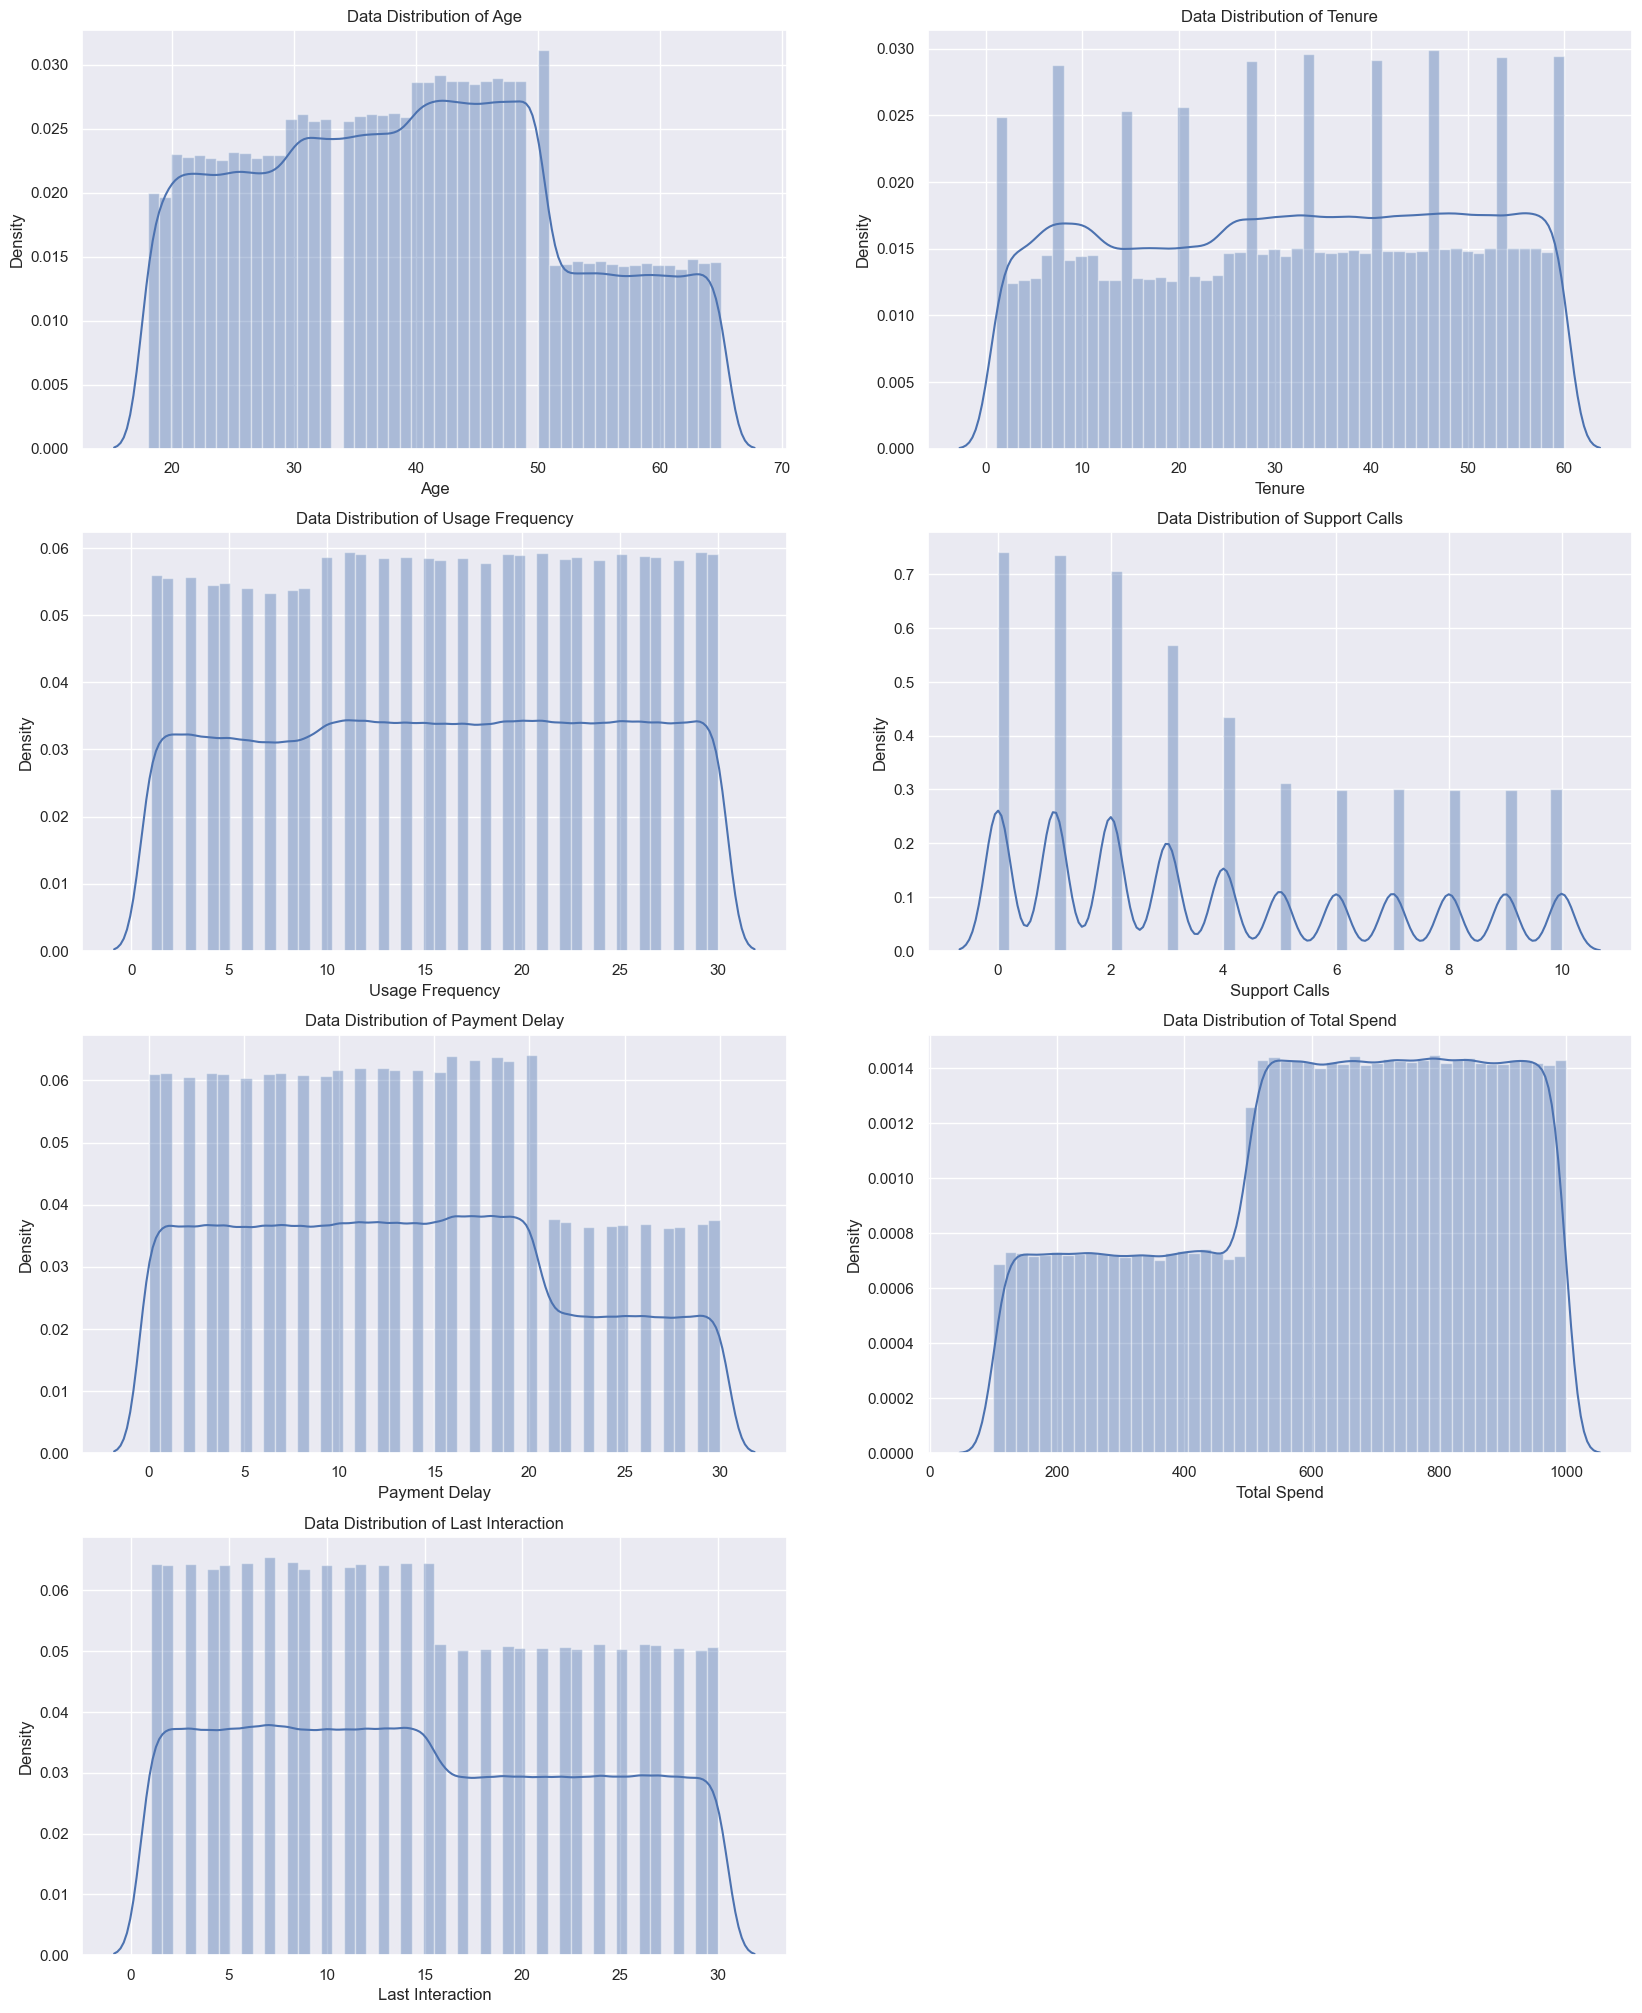

In [18]:
# Calculate skew and plotting numerical categories
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in edanum_col:
    '''
    Function to iterate through column and show distribution and skew level of the numerical columns
    '''
    print(f'Skewness of {col} : {df[col].skew()}')
    plt.subplot(4,2,x)
    sns.distplot(df[col])
    plt.title(f'Data Distribution of {col}')
    x+=1

In [19]:
# Describe the numerical columns
df[edanum_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,505206.0,39.704172,12.670577,18.0,29.0,40.0,49.0,65.0
Tenure,505206.0,31.350435,17.237482,1.0,16.0,32.0,46.0,60.0
Usage Frequency,505206.0,15.714825,8.619323,1.0,8.0,16.0,23.0,30.0
Support Calls,505206.0,3.833317,3.133603,0.0,1.0,3.0,6.0,10.0
Payment Delay,505206.0,13.496843,8.451187,0.0,6.0,13.0,20.0,30.0
Total Spend,505206.0,619.835903,245.239357,100.0,446.0,648.0,824.0,1000.0
Last Interaction,505206.0,14.610581,8.608286,1.0,7.0,14.0,22.0,30.0


Overall, all numerical data inside the dataset is showing normal distribution behaviour except for Support Calls that shows a moderate level of Skew.

It can be inferred from the plot above:
- Majority of customer age are between 40 - 50 years old.
- Tenure is ranging from 1 - 60 months and normally distributed
- Usage frequency is ranging from 1 - 30 per month. On average, the customers are using our company services for about 15 times a month
- Support call ranging from 1 - 10 with most of the customer only make 1-2 support calls per month
- Delay payment up to 30 days, with most of the customers pay within 20 days
- Total spend is showing 2 categories of spender, low spender that is spending 0 - 500 USD and high spender that is spending 500 - 1000 USD
- Last interaction duration in 30 days, with most of the customer tend to have up to 15 days of last interaction

## Categorical Column

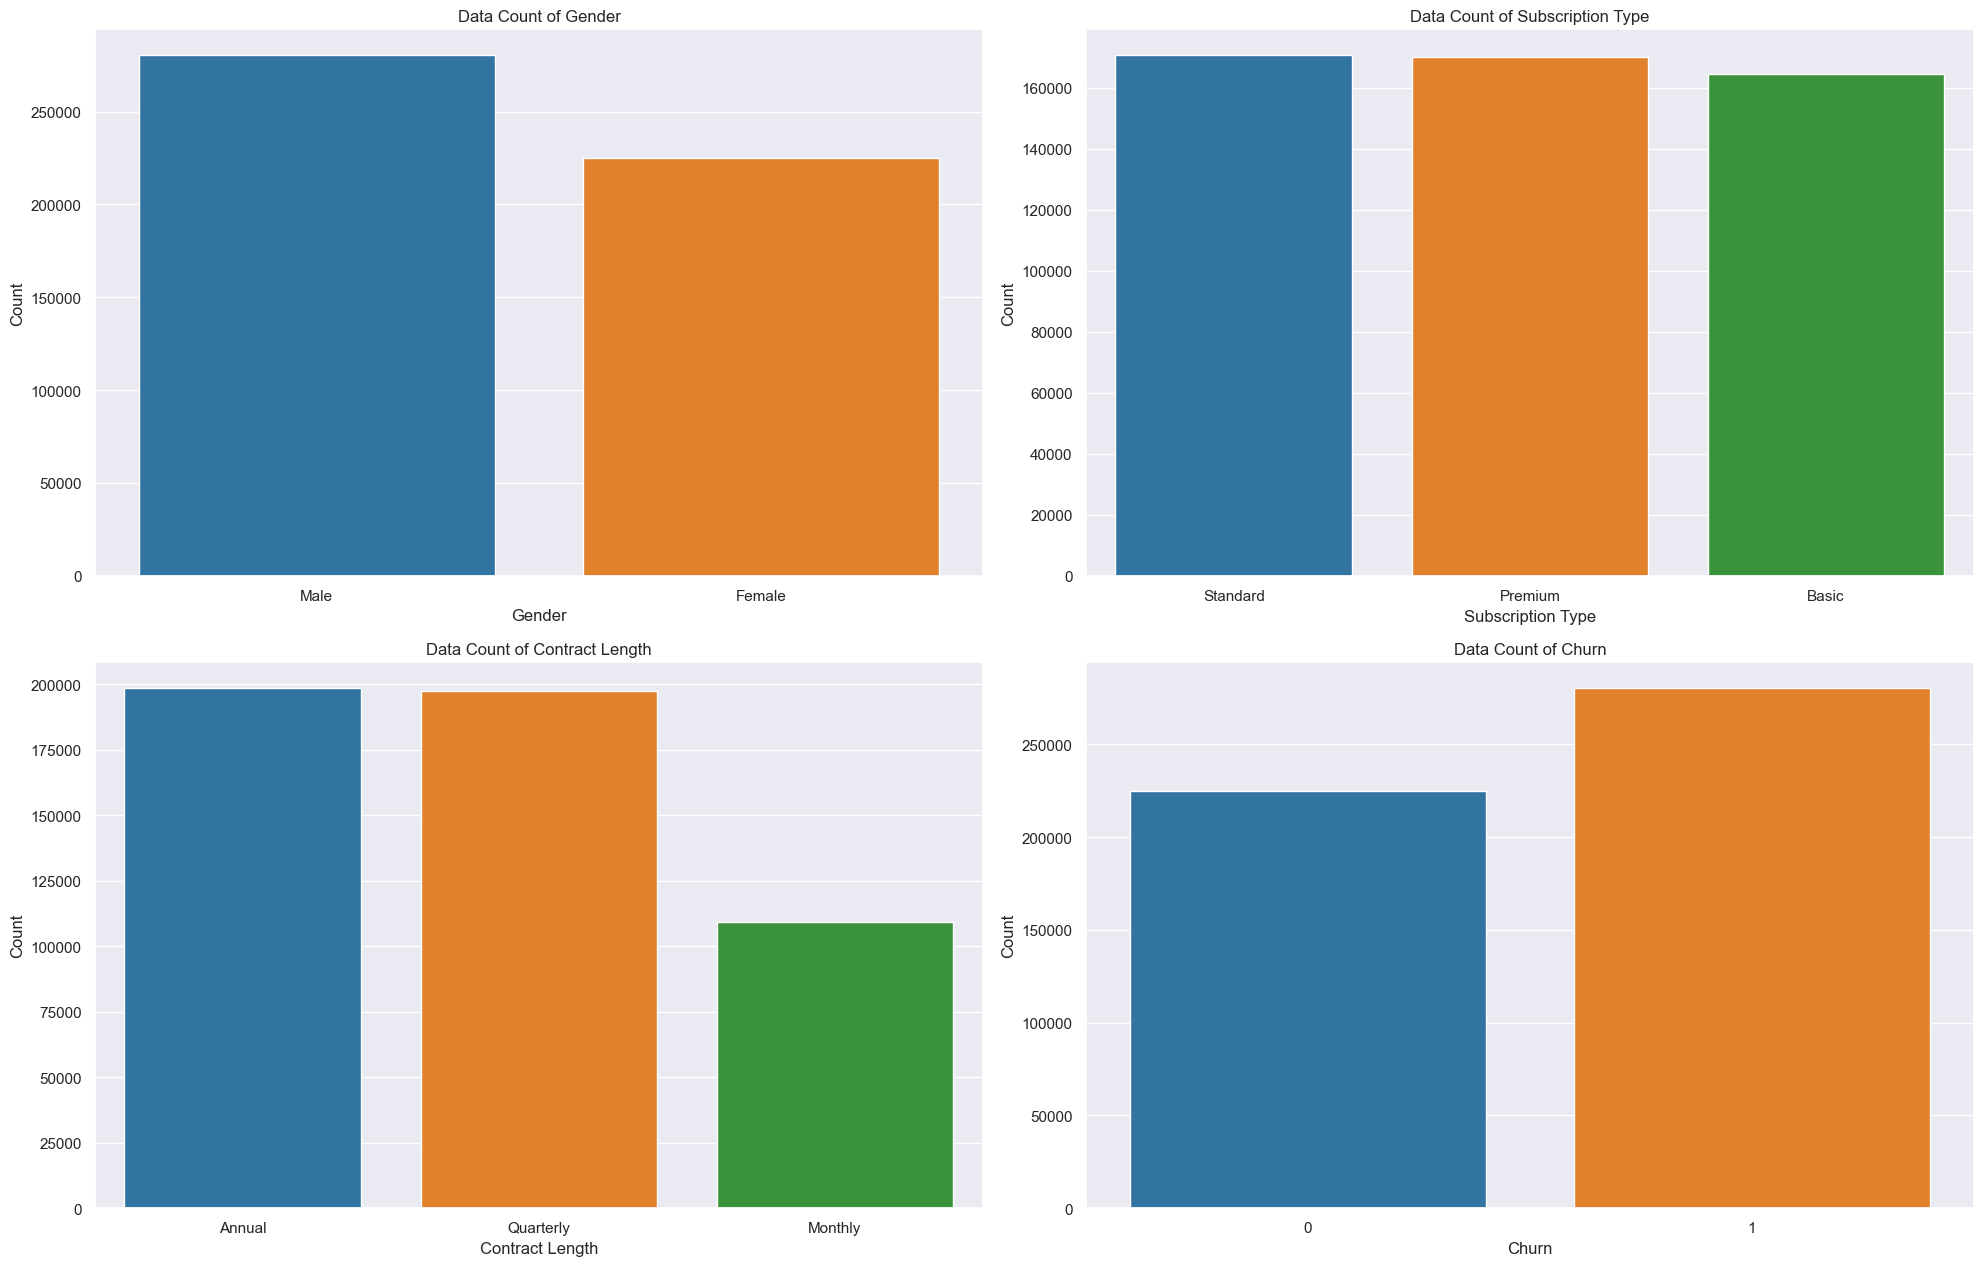

In [20]:
# Plotting the trend of the categorical columns
plt.figure(figsize=(20, 25))

# Introduce palette for better visualization
custom_colors = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])


for x, col in enumerate(edacat_col, start=1):
    '''
    Function to plot the total count of categorical column values
    '''
    plt.subplot(4, 2, x)

    # Calculate the count for each column
    counts = df[col].value_counts()
    
    # Convert to df
    counts_df = counts.reset_index()
    counts_df.columns = [col, 'Count']
    
    # Plotting
    sns.barplot(x=counts_df[col], y=counts_df['Count'], palette = custom_colors)
    
    plt.title(f'Data Count of {col}')

plt.tight_layout()
plt.show()

We also want to know what is the pattern on the categorical column

From the Categorical Plot above, it can be inferred that:
- The majority of the customers are male, that counts for a total of 275,000 customers
- Evenly distributed of customers subscription plan of Standard, Premium, and Basic
- Most of the contract length are Annual and Quarterly (same amount of 200,000 customers), where monthly contract length is the less favorite with only around 100,000 customers
- Churn will be considered as a target label with a relatively balanced data

Furthermore, we also would like to know how this categorical column related with the target label (churn)

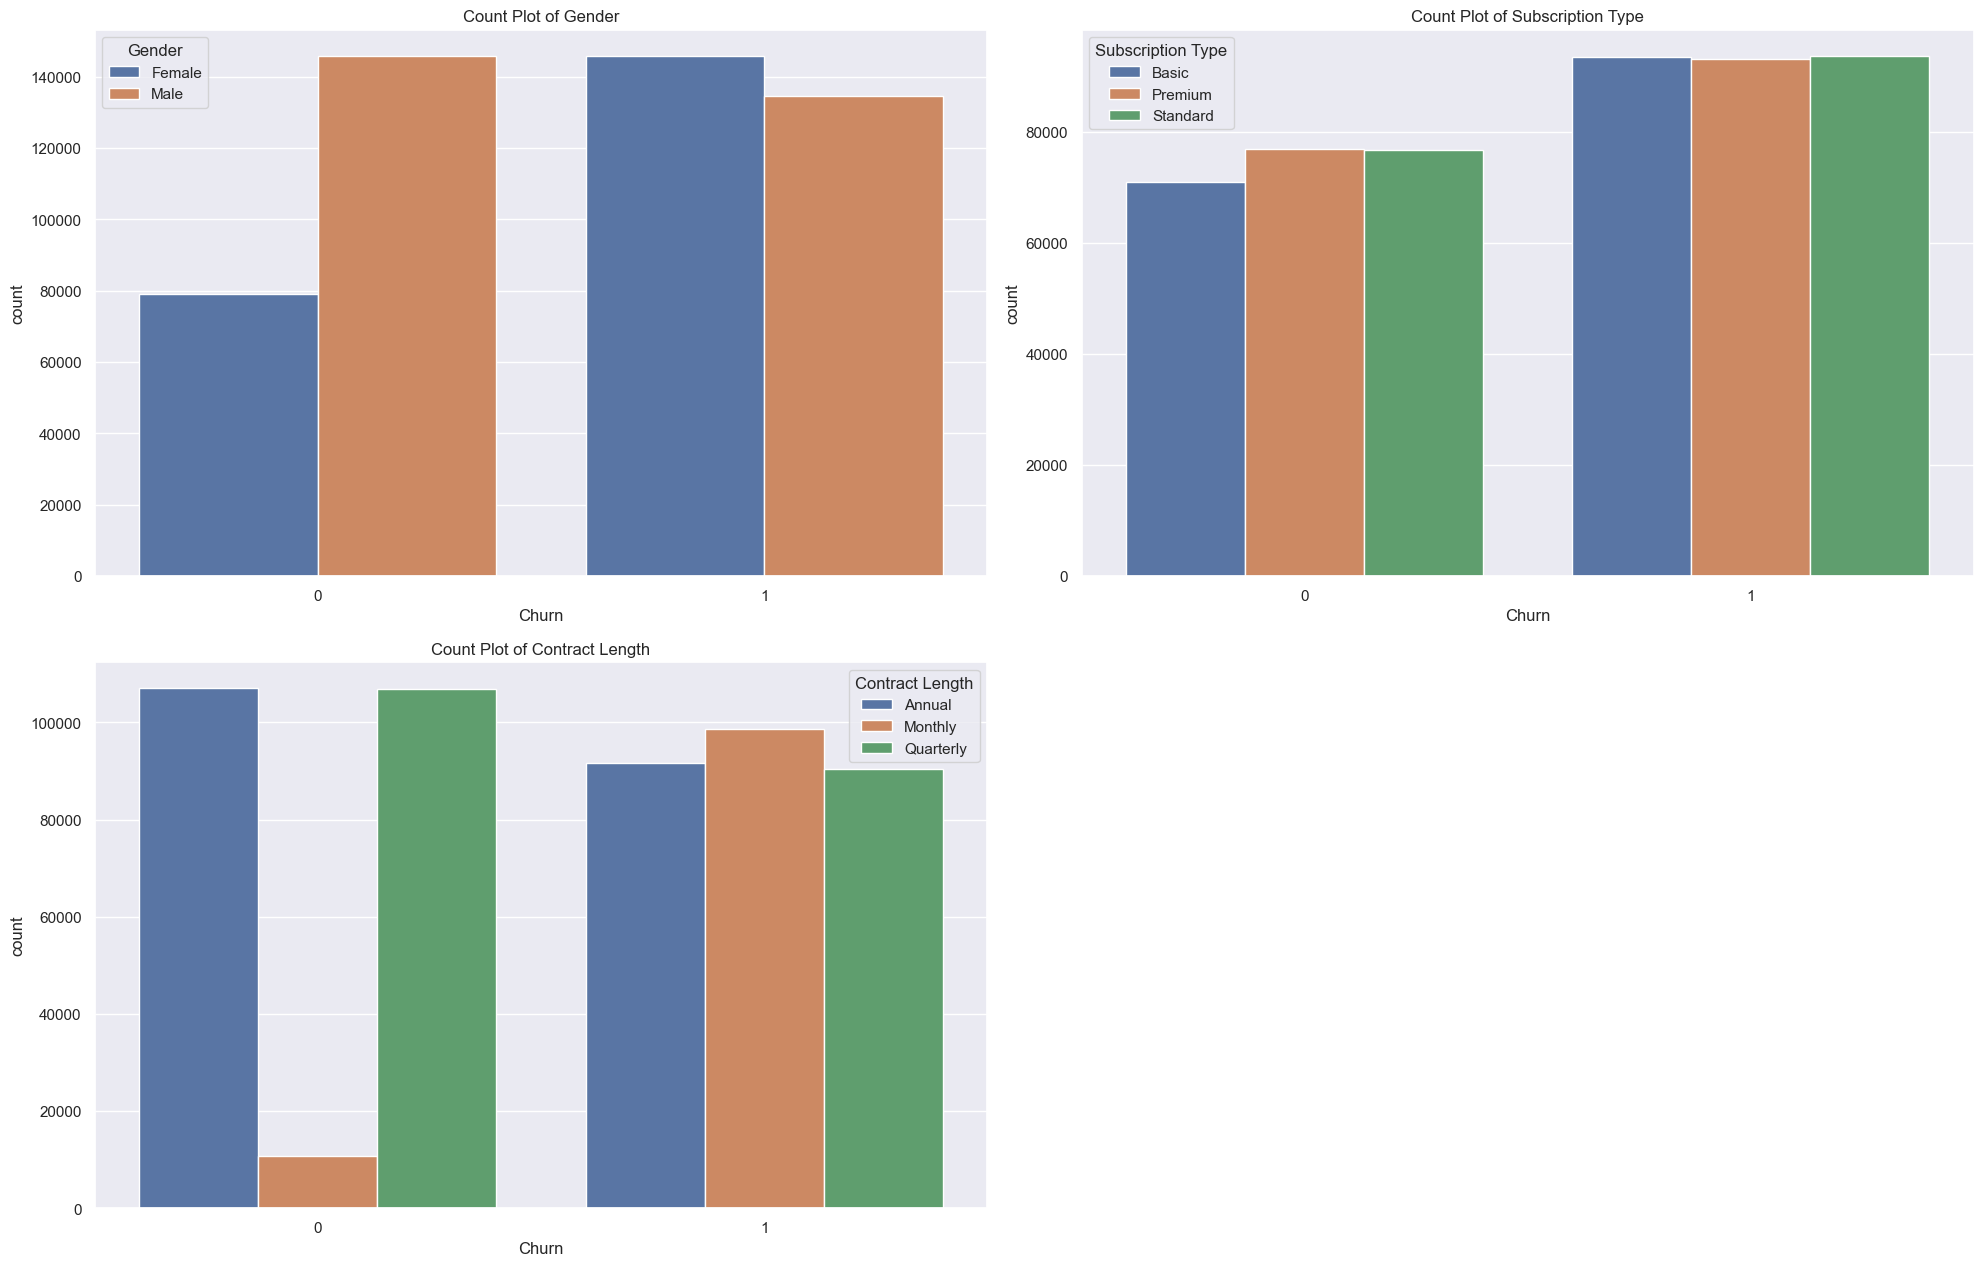

In [21]:
# Plot categorical column and their relation with target label
plt.figure(figsize=(20,25))

for i, col in enumerate(edacat_col[:3], start=1):
    '''
    Function to plot each categorical column count related with the target label
    Iterate for the categorical column except for the churn column
    '''
    plt.subplot(4, 2, i)
    
    # Group by churn with related column
    counts = df.groupby(['Churn', col]).size().reset_index(name='count')
    
    # Plotting
    sns.barplot(x='Churn', y='count', hue=col, data=counts)
    
    # Setting the title column
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

Further analysis from the table above:
- Most of the customers who are likely to churn are female customers, where on the other side, male customers are more unlikely to churn
- In terms of the subscription plan, there are no difference between each plans that is more likely to churn. All types of subscription plans shows similar tendency to churn.
- The contract length data shows that customers with contract length monthly is more likely to churn compared with annual and quarterly contract.

For the next EDA, we know that high spender customers is the one that have a total spending of more than 500 USD. What is the percentage of the gender contribution on this?

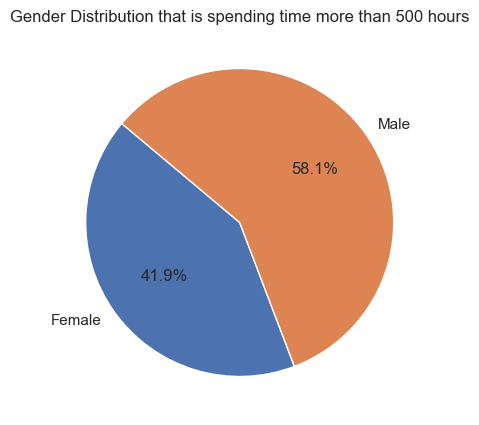

In [22]:
# Create pie chart to show percentage of gender where total spend is more than 500
gender_contribution_spend_time = df[(df['Total Spend'] >= 500)].groupby('Gender').size()

plt.figure(figsize=(7, 5))
plt.pie(gender_contribution_spend_time, labels=gender_contribution_spend_time.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution that is spending time more than 500 hours')
plt.show()

From the pie chart above, it is shown that most high spender customers are male customer

We also know that Female customers are more likely to Churn, does this in line with the contract length behaviour? Does the monthly contract is dominated by female customers?

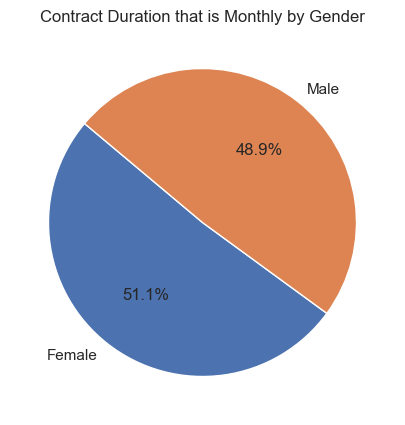

In [23]:
# Create gender percentage where the contract length type is monthly
gender_monthly = df[(df['Contract Length'] == 'Monthly')].groupby('Gender').size()

plt.figure(figsize = (7,5))
plt.pie(gender_monthly, labels = gender_monthly.index, autopct='%1.1f%%', startangle=140)
plt.title('Contract Duration that is Monthly by Gender')
plt.show()

The pie chart shows us that most of the customer, which contract length is monthly is dominated with Female customers. This supports the data that most of the customers who are likely to churn is the customer with monthly contract length

Next EDA, we want to know is there any correlation between payment delay and churn rate?

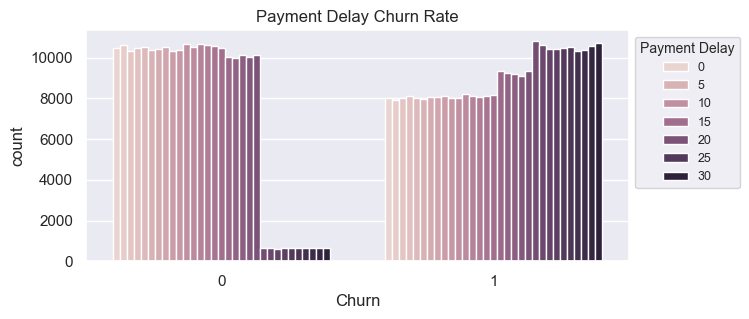

In [24]:
plt.figure(figsize = (7,3))

# Group by churn and payment delay
counts = df.groupby(['Churn', 'Payment Delay']).size().reset_index(name='count')

# Plotting
sns.barplot(x='Churn', y='count', hue='Payment Delay', data=counts)

# Adjusting the hue location
plt.legend(title='Payment Delay', title_fontsize='10', fontsize='9', loc='upper left', bbox_to_anchor=(1, 1))

# Setting the title column
plt.title(f'Payment Delay Churn Rate')

# plt.tight_layout()
plt.show()

Surprisingly, customers that delay their payment in the range of 20 - 30 days are more unlikely to churn compared with other that pay within 20 days. Clearly this findings will be insightful for the marketing team to create strategic payment plan.

---

# 5. Feature Engineering

## Splitting Dataset

In [25]:
# Split Dataset
X = df.drop('Churn', axis = 1)
y = df['Churn']
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30,Female,39,14,5,18,Standard,Annual,932,17
1,65,Female,49,1,10,8,Basic,Monthly,557,6
2,55,Female,14,4,6,18,Basic,Quarterly,185,3
3,58,Male,38,21,7,7,Standard,Monthly,396,29
4,23,Male,32,20,5,8,Basic,Monthly,617,20
...,...,...,...,...,...,...,...,...,...,...
505202,45,Female,33,12,6,21,Basic,Quarterly,947,14
505203,37,Male,6,1,5,22,Standard,Annual,923,9
505204,25,Male,39,14,8,30,Premium,Monthly,327,20
505205,50,Female,18,19,7,22,Standard,Monthly,540,13


In [26]:
# Split Train-set and Test-set
# Using stratify y to balance the target value in split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=69)

print('Train Size  :', X_train.shape)
print('Test Size   :', X_test.shape)

Train Size  : (404164, 10)
Test Size   : (101042, 10)


## Handling Missing Value

In [27]:
X_train.isnull().sum().sum()

0

In [28]:
X_test.isnull().sum().sum()

0

No missing Values found in train-set and test-set

## Identify Cardinallity

In [29]:
cat_col = ['Gender', 'Subscription Type', 'Contract Length']

In [30]:
for col in cat_col:
    print(f'No of Unique Value {col} :  {X_train[col].nunique()}')

No of Unique Value Gender :  2
No of Unique Value Subscription Type :  3
No of Unique Value Contract Length :  3


All categorical column have low cardinallity

## Outlier Handling

Outlier will be handled based on their skew behaviour and utilizing windsorizer library

In [31]:
num_col = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

Before capping and detecting outlier, we want to know the distribution type for each columns

In [32]:
# Create empty list to store the column name
skewed = []
extreme_skew = []
normal_dist = []

# Iterate over the numerical column
for i in list(X_train[num_col].columns):
    '''
    This function iterated through each column to determine the skewness
    '''
    print(f'skew {i} = {X_train[i].skew()}')
    if -0.5 <= X_train[i].skew() <= 0.5:
        normal_dist.append(i)
    elif X_train[i].skew() < -1 or X_train[i].skew() > 1:
        extreme_skew.append(i)
    else:
        skewed.append(i)

print('extreme skew: ', extreme_skew)
print('skewed: ', skewed)
print('normal: ', normal_dist)

skew Age = 0.14422841222018112
skew Tenure = -0.07004717769614513
skew Usage Frequency = -0.03388661505056966
skew Support Calls = 0.5438715560361432
skew Payment Delay = 0.1994188590903699
skew Total Spend = -0.39483853504957483
skew Last Interaction = 0.15375543431751518
extreme skew:  []
skewed:  ['Support Calls']
normal:  ['Age', 'Tenure', 'Usage Frequency', 'Payment Delay', 'Total Spend', 'Last Interaction']


Based on the skew calculation, most of the column distribution is normal, except for support call (moderate skew). So capping will use 2 methods, which are Gaussian (normal distribution) and Tukeys (moderate skew)

In [33]:
# Calculate the outlier percentage in the dataset


def calculate_outlier_percentage(data, column):
    '''
    Function to calculate percentage of outlier
    '''
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return (len(outliers) / len(data)) * 100


# Calculate outliers percentage
for col in num_col:
    outlier_percentage = calculate_outlier_percentage(X_train, col)
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

Percentage of outliers in Age: 0.00%
Percentage of outliers in Tenure: 0.00%
Percentage of outliers in Usage Frequency: 0.00%
Percentage of outliers in Support Calls: 0.00%
Percentage of outliers in Payment Delay: 0.00%
Percentage of outliers in Total Spend: 0.00%
Percentage of outliers in Last Interaction: 0.00%


Although the outlier presence is detected at 0%, due to the large volume of data, we just want to make sure that there are no outliers in the training data. So capping using windsorizer will be applied.

In [34]:
#Capping normal distribution

winsoriser = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_dist,
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)

# Moderate skew
winsoriser_skew = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=skewed)

X_train_capped = winsoriser_skew.fit_transform(X_train_capped)

## Feature Selection

In [35]:
# Concat the feature with label
train_df = pd.concat([X_train_capped, y_train], axis=1)
train_df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
87852,52,Male,17,7,7,21,Standard,Annual,748,17,1
499066,31,Female,12,18,5,27,Premium,Monthly,983,14,1
234488,32,Male,17,5,3,13,Basic,Quarterly,386,24,1
56664,48,Female,53,12,6,9,Standard,Monthly,366,8,1
191850,62,Female,11,16,4,5,Standard,Quarterly,781,17,1
...,...,...,...,...,...,...,...,...,...,...,...
257279,50,Male,47,30,4,10,Premium,Quarterly,705,21,0
466689,55,Female,35,4,10,30,Premium,Quarterly,439,25,1
367858,38,Male,60,26,2,5,Standard,Quarterly,958,17,0
500594,27,Female,43,23,3,22,Standard,Monthly,578,1,1


Using Phik correlation to check the correlation of each feature to the target label

In [36]:
# Check feature correlation witht target
phik_cor = train_df.phik_matrix().Churn

interval columns not set, guessing: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


In [37]:
phik_cor.sort_values(ascending=False)

Churn                1.000000
Support Calls        0.708546
Total Spend          0.545570
Payment Delay        0.515233
Age                  0.476493
Gender               0.261263
Contract Length      0.224110
Last Interaction     0.191661
Usage Frequency      0.087625
Tenure               0.058959
Subscription Type    0.012096
Name: Churn, dtype: float64

We will set the correlation threshold of 0.1 phik score. Therefore, there are 7 features that will be used for the maching learning modelling. The 7 selected features are: Support Calls, Total Spend, Payment Delay, Age, Gender, Contract Length and Last Interaction

In [38]:
# Drop other column that is not considered as features
X_train_capped.drop(['Usage Frequency', 'Tenure', 'Subscription Type'], axis = 1, inplace= True)
X_test.drop(['Usage Frequency', 'Tenure', 'Subscription Type'], axis = 1, inplace= True)

In [39]:
X_train_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404164 entries, 87852 to 69717
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Age               404164 non-null  int64 
 1   Gender            404164 non-null  object
 2   Support Calls     404164 non-null  int64 
 3   Payment Delay     404164 non-null  int64 
 4   Contract Length   404164 non-null  object
 5   Total Spend       404164 non-null  int64 
 6   Last Interaction  404164 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 24.7+ MB


All numerical and categorical feature are already in the correct dtype. Further process of encoding and scaling will require separated numerical and categorical features. Thus, the numerical and categorical will be initialized

In [40]:
# Determine numerical and categorical feature
num_feature = ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cat_feature = ['Gender', 'Contract Length']

In [41]:
X_train_capped

,Age,Gender,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction
87852,52,Male,7,21,Annual,748,17
499066,31,Female,5,27,Monthly,983,14
234488,32,Male,3,13,Quarterly,386,24
56664,48,Female,6,9,Monthly,366,8
191850,62,Female,4,5,Quarterly,781,17
...,...,...,...,...,...,...,...
257279,50,Male,4,10,Quarterly,705,21
466689,55,Female,10,30,Quarterly,439,25
367858,38,Male,2,5,Quarterly,958,17
500594,27,Female,3,22,Monthly,578,1


## Column Transforming

Numerical Column = Since most of the numerical feature is normally distributed. Standard Scaler will be used for scaling method.  
Categorical Column = Categorized as ordinal type, so transform will using ordinal encoder

In [42]:
# Numerical Columns // ['Age', 'Support', 'Payment Delay', 'Total Spend', 'Last Interaction']
scaler_standard = StandardScaler()

# Categorical Columns // ['Gender', 'Contract Length']
encoder_ord = OrdinalEncoder()

In [43]:
# Defining the columns transformer
preprocess = ColumnTransformer(
    transformers=[('numerical scaling', scaler_standard, num_feature),
                ('categorical encode', encoder_ord, cat_feature),
                ], remainder= 'passthrough')
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical scaling', StandardScaler(),
                                 ['Age', 'Support Calls', 'Payment Delay',
                                  'Total Spend', 'Last Interaction']),
                                ('categorical encode', OrdinalEncoder(),
                                 ['Gender', 'Contract Length'])])

---

# 6. Model Definition

In this project, we will use 5 base model for training. Cross validation for that 5 model will be performed to find the best model. The model that will be used to cross validate:  
- Decision Tree
- Random Forest
- Ada Boost
- SVM
- KNN

In [44]:
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier(random_state=42)
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier(n_jobs = -1,random_state=42)
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier(random_state=42)
# Defining SVM Classifier Model
svm_model = SVC()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()


We want to create a pipeline to integrate the preprocessing of scaling with the model

In [45]:
# Create pipeline to integrate the column transformer / preprocess to the model

pipe_dt = Pipeline([('preprocess', preprocess),
                    ('dt', dt_model)])
pipe_rf = Pipeline([('preprocess', preprocess),
                    ('rf', rf_model)])
pipe_ada = Pipeline([('preprocess', preprocess),
                    ('ada', ada_model)])
pipe_svm = Pipeline([('preprocess', preprocess),
                    ('svm', svm_model)])
pipe_knn = Pipeline([('preprocess', preprocess),
                    ('knn', knn_model)])

---

# 7. Model Training

Cross validation for the 5 introduced model will be using 4 folds of cross validation. The objective is to find the best average result for metrics recall

## Cross Validation Baseline Model

In [46]:
# Setting skfold value for cv number of splits 
skfold=StratifiedKFold(n_splits=4,random_state=42,shuffle=True)

# checking cross validation score
cv_dt_model = cross_val_score(pipe_dt, X_train_capped ,y_train, cv=skfold, scoring="recall", n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train_capped ,y_train, cv=skfold, scoring="recall", n_jobs=-1)
cv_ada_model = cross_val_score(pipe_ada, X_train_capped ,y_train, cv=skfold, scoring="recall", n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svm, X_train_capped ,y_train, cv=skfold, scoring="recall", n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train_capped ,y_train, cv=skfold, scoring="recall", n_jobs=-1)


name_model = []
cv_scores=0
for cv,name in zip(
    [cv_dt_model,cv_rf_model,cv_ada_model,cv_svm_model,cv_knn_model],
    ['dt_model','rf_model','ada_model','svm_model', 'knn_model']):
    '''
    Loop function to check the value of cross validation
    '''
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

dt_model
recall - All - Cross Validation  :  [0.87691403 0.87666227 0.87791009 0.87972833]
recall - Mean - Cross Validation :  0.8778036787673937
recall - Std - Cross Validation  :  0.0012051877326734327
recall - Range of Test-Set       :  0.8765984910347203 - 0.8790088665000672
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.99397494 0.99367179 0.99468787 0.99433135]
recall - Mean - Cross Validation :  0.9941664855478931
recall - Std - Cross Validation  :  0.000380931413776365
recall - Range of Test-Set       :  0.9937855541341167 - 0.9945474169616695
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.84341967 0.84375557 0.84589468 0.84117081]
recall - Mean - Cross Validation :  0.8435601829848266
recall - Std - Cross Validation  :  0.001674584178846012
recall - Range of Test-Set       :  0.8418855988059806 - 0.8452347671636726
--------------------------------------------------
svm_mode

The best model with default parameter obtained from cross validation is ***random forest with average score of 0.99***

## Parameter Tuning

After we know the best model to predict the dataset, we would like to tune this model to know the best hyperparameter for this model.  
This section will tune random forest model, as it has determined as the best model for predicting the dataset with highest recall score compared with other model

### Random Forest Tuning

First, we need to set the hyperparameter and type of search. This project will use random search with n_iter of 50

In [47]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_rf = {'rf__n_estimators': range(50, 300),
              'rf__max_depth': range(1, 10),
              'rf__min_samples_split': range(2, 10),
              'rf__criterion': ['gini', 'entropy']}
random_grid_rf

{'rf__n_estimators': range(50, 300),
 'rf__max_depth': range(1, 10),
 'rf__min_samples_split': range(2, 10),
 'rf__criterion': ['gini', 'entropy']}

In [48]:
# Train with Random Search

rf_randomcv = RandomizedSearchCV(estimator=pipe_rf, 
                                 param_distributions=random_grid_rf,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=42, 
                                 n_jobs=-1, 
                                 scoring='recall')
rf_randomcv.fit(X_train_capped, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numerical '
                                                                               'scaling',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'Support '
                                                                                'Calls',
                                                                                'Payment '
                                                                                'Delay',
                                                                                'Total '
                                                                                'Spend',
                                                                                'Last '
                                                                                'Interaction']),
                                                                              ('categorical '
                                                                               'encode',
                                                                               OrdinalEncoder(),
                                                                               ['Gender',
                                                                                'Contract '
                                                                                'Length'])])),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': range(1, 10),
                                        'rf__min_samples_split': range(2, 10),
                                        'rf__n_estimators': range(50, 300)},
                   random_state=42, scoring='recall')

In [49]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'rf__n_estimators': 220,
 'rf__min_samples_split': 9,
 'rf__max_depth': 9,
 'rf__criterion': 'entropy'}

The above parameter are the best hyperparameter for random forest model after tuning

In [50]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_
rf_randomcv_best

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical scaling',
                                                  StandardScaler(),
                                                  ['Age', 'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('categorical encode',
                                                  OrdinalEncoder(),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        min_samples_split=9, n_estimators=220,
                                        n_jobs=-1, random_state=42))])

---

# 8. Model Evaluation

## 8.1 Evaluation Before Tuning

First, we need to check the performance from the base base model, which is random forest (with default parameter) to the train and test set

In [51]:
# Test baseline model to test-set

pipe_rf.fit(X_train_capped, y_train)

y_pred_train = pipe_rf.predict(X_train_capped)
y_pred_test = pipe_rf.predict(X_test)

print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    179771
           1       1.00      1.00      1.00    224393

    accuracy                           1.00    404164
   macro avg       1.00      1.00      1.00    404164
weighted avg       1.00      1.00      1.00    404164
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     44943
           1       0.90      0.99      0.94     56099

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.93    101042
 



Further, we also want to the the confusion matriks for both trainset and testset using this model

Confusion Matriks for Train-set
Confusion Matrix      : 

Confusion Matriks for Test-set
Confusion Matrix      : 


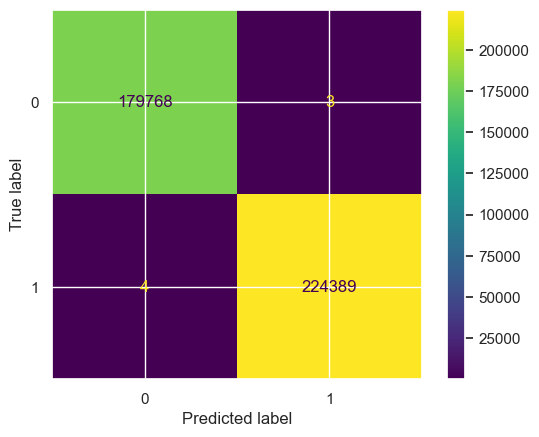

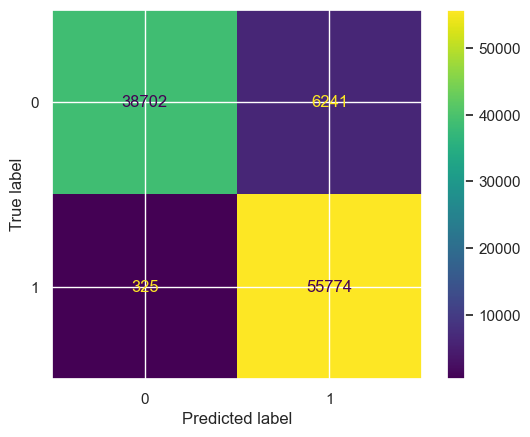

In [52]:
# Confusion matriks for model before tuning on train-set and test-set
print('Confusion Matriks for Train-set')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_train_capped, y_train))

print('')

print('Confusion Matriks for Test-set')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test))

from the evaluation above, it can be summarized for the base model of random forest:


In [53]:
# Create a report for model before tuning
base_reports = {}
score_base_reports = {
    'Train - Recall' : '{:.2f}'.format(recall_score(y_train, y_pred_train)),
    'Train - False Negative' : '4',
    'Test - Recall' : '{:.2f}'.format(recall_score(y_test, y_pred_test)),
    'Test - False Negative' : '325',
}
base_reports['Random Forest Before Tuning'] = score_base_reports
pd.DataFrame(base_reports)

,Random Forest Before Tuning
Train - Recall,1.00
Train - False Negative,4
Test - Recall,0.99
Test - False Negative,325


For random forest model before tuning, the model is already in **good fit**. Since we are looking at the recall metrics, we want to focus of the True Negative.  
This model have achieved only 4 False Negative in the train-set and 325 False Negative in the test set.

## 8.2 Evaluation After Tuning

We have obtained the best hyperparameter for the Random Forest model.   
{'rf__n_estimators': 220,  
 'rf__min_samples_split': 9,  
 'rf__max_depth': 9,  
 'rf__criterion': 'entropy'}


We will use this model to predict and evaluate on train and test data

Recall Score - Train Set   :  0.9837829165793942 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92    179771
           1       0.90      0.98      0.94    224393

    accuracy                           0.93    404164
   macro avg       0.94      0.92      0.93    404164
weighted avg       0.93      0.93      0.93    404164
 

Confusion Matrix      : 


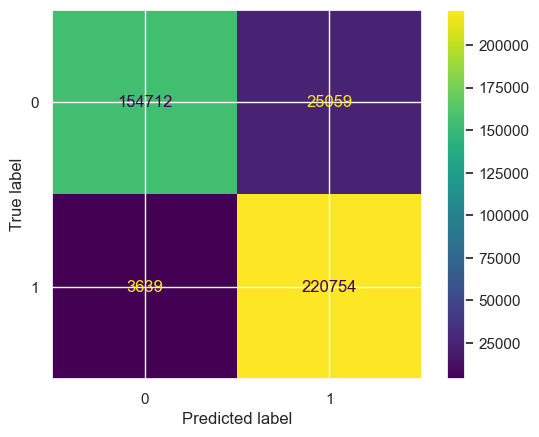

In [54]:
# Check Performance Model against Train-Set

y_pred_train_best = rf_randomcv_best.predict(X_train_capped)

print('Recall Score - Train Set   : ', recall_score(y_train, y_pred_train_best), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_train_capped, y_train))

Recall Score - Test Set   :  0.9830656517941496 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92     44943
           1       0.90      0.98      0.94     56099

    accuracy                           0.93    101042
   macro avg       0.94      0.92      0.93    101042
weighted avg       0.93      0.93      0.93    101042
 

Confusion Matrix      : 


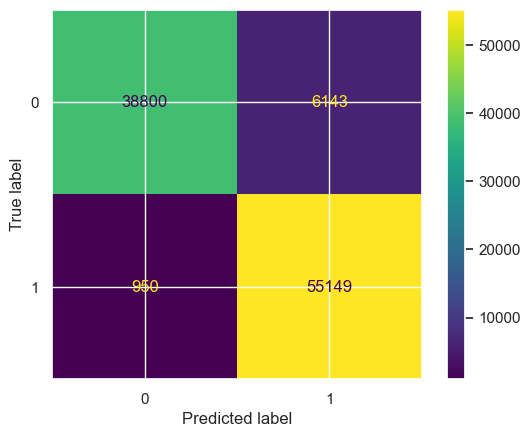

In [55]:
# Check Performance Model against Test-Set

y_pred_test_best = rf_randomcv_best.predict(X_test)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_best), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test, y_test))

In [56]:
# Create a report for best model after tuning
best_reports = {}
score_best_reports = {
    'Train - Recall' : '{:.2f}'.format(recall_score(y_train, y_pred_train_best)),
    'Train - False Negative' : '3639',
    'Test - Recall' : '{:.2f}'.format(recall_score(y_test, y_pred_test_best)),
    'Test - False Negative' : '950',
}
best_reports['Random Forest After Tuning'] = score_best_reports
pd.DataFrame(best_reports)

,Random Forest After Tuning
Train - Recall,0.98
Train - False Negative,3639
Test - Recall,0.98
Test - False Negative,950


Random forest model after tuning resulting a more ***goodfit model*** with no variance between the train-set and test-set recall score.  

### Model Improvement after Tuning

Overall comparison between the model before and after tuning:

In [57]:
# Comparison dataframe before and after tuning
all_reports = {}
all_reports['Random Forest Before Tuning'] = score_base_reports
all_reports['Random Forest After Tuning'] = score_best_reports
pd.DataFrame(all_reports)

,Random Forest Before Tuning,Random Forest After Tuning
Train - Recall,1.00,0.98
Train - False Negative,4,3639
Test - Recall,0.99,0.98
Test - False Negative,325,950


The following are improvement made after tuning:
- A more goodfit model with no variance between the Train-set and Test-set Recall Score
- Faster runtime in model train and predict compared with baseline model
- Tuning model is giving a more goodfit with faster runtime because the tuned model have determined the max depth value of a random forest, where the baseline/default model have no limit in determining the max depth. Thus, base model will require more runtime

## 8.3 Plus and Minus of the Best Model (After Tuning) Evaluation

We want to evaluate the model performance and check the plus point and the minus point of the developed model. We will first combine the predection from the test set to the original dataframe only for the test index to evaluate the model.

Getting the original dataframe but only within test set index

In [58]:
# Test Set Index
test_index = X_test.index

# Create df with only test set rows from the original DataFrame
df_ori_test = df_ori.loc[test_index]

# Convert numerical to int as been done in the data loading
df_ori_test[col_int] = df_ori_test[col_int].astype(int)

df_ori_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
236416,242809.0,30,Male,9,6,1,30,Standard,Annual,389,5,1
96033,98849.0,60,Male,13,29,2,6,Premium,Monthly,221,9,1
442614,1782.0,19,Female,26,29,6,0,Basic,Monthly,149,9,0
304635,311749.0,48,Male,37,10,2,8,Premium,Quarterly,821,20,0
112052,115537.0,65,Female,41,6,6,4,Standard,Annual,733,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15147,15156.0,20,Male,39,1,8,9,Premium,Annual,675,17,1
340928,348043.0,25,Male,6,15,0,14,Premium,Annual,949,30,0
470110,29278.0,32,Female,41,24,5,23,Standard,Monthly,369,11,1
413960,421075.0,43,Male,42,5,3,3,Basic,Annual,553,26,0


After we get the original dataframe on the test-set index. We will combine the table with the prediction for the test set using best tuned model

In [59]:
# Convert array to df
y_pred_test_best_df = pd.DataFrame(y_pred_test_best, columns=['Prediction'], index=df_ori_test.index)

# Combine the dataframe with prediction result for test set
df_evaluation = pd.concat([df_ori_test, y_pred_test_best_df], axis = 1)

df_evaluation

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Prediction
236416,242809.0,30,Male,9,6,1,30,Standard,Annual,389,5,1,1
96033,98849.0,60,Male,13,29,2,6,Premium,Monthly,221,9,1,1
442614,1782.0,19,Female,26,29,6,0,Basic,Monthly,149,9,0,1
304635,311749.0,48,Male,37,10,2,8,Premium,Quarterly,821,20,0,0
112052,115537.0,65,Female,41,6,6,4,Standard,Annual,733,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,15156.0,20,Male,39,1,8,9,Premium,Annual,675,17,1,1
340928,348043.0,25,Male,6,15,0,14,Premium,Annual,949,30,0,0
470110,29278.0,32,Female,41,24,5,23,Standard,Monthly,369,11,1,1
413960,421075.0,43,Male,42,5,3,3,Basic,Annual,553,26,0,0


The concat dataframe (df_evalution) consist information of the original dataframe within the test index and showing the actual customer churn with the prediction. This dataframe is ready for further analysis

### Model Plus Point

To evaluate the plus point of the model, we need to check on where this model can predict correctly in the evaluation dataframe above. Specifically, this model is built to create marketing to the customers that are going to churn. Evaluating the plus point will utilize true positive, where customers are both predicted and actually will churn. Thus, marketing team will able to contact those customer.  
  
We will create new dataframe to filter only where the prediction of the model is correct

In [60]:
# Create new dataframe for correct prediction
model_plus = df_evaluation[(df_evaluation['Churn'] == 1) & (df_evaluation['Prediction'] == 1)]

model_plus

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Prediction
236416,242809.0,30,Male,9,6,1,30,Standard,Annual,389,5,1,1
96033,98849.0,60,Male,13,29,2,6,Premium,Monthly,221,9,1,1
112052,115537.0,65,Female,41,6,6,4,Standard,Annual,733,12,1,1
211219,216511.0,33,Male,19,1,2,1,Premium,Annual,426,1,1,1
22172,22181.0,53,Male,29,5,5,0,Basic,Quarterly,721,29,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187969,192780.0,31,Female,1,14,6,15,Premium,Annual,441,9,1,1
4881,4890.0,55,Female,6,28,8,26,Premium,Annual,709,4,1,1
246567,253447.0,42,Female,44,27,2,10,Standard,Annual,103,14,1,1
15147,15156.0,20,Male,39,1,8,9,Premium,Annual,675,17,1,1


We need to evaluate, at which aspect that this model is predicting correctly

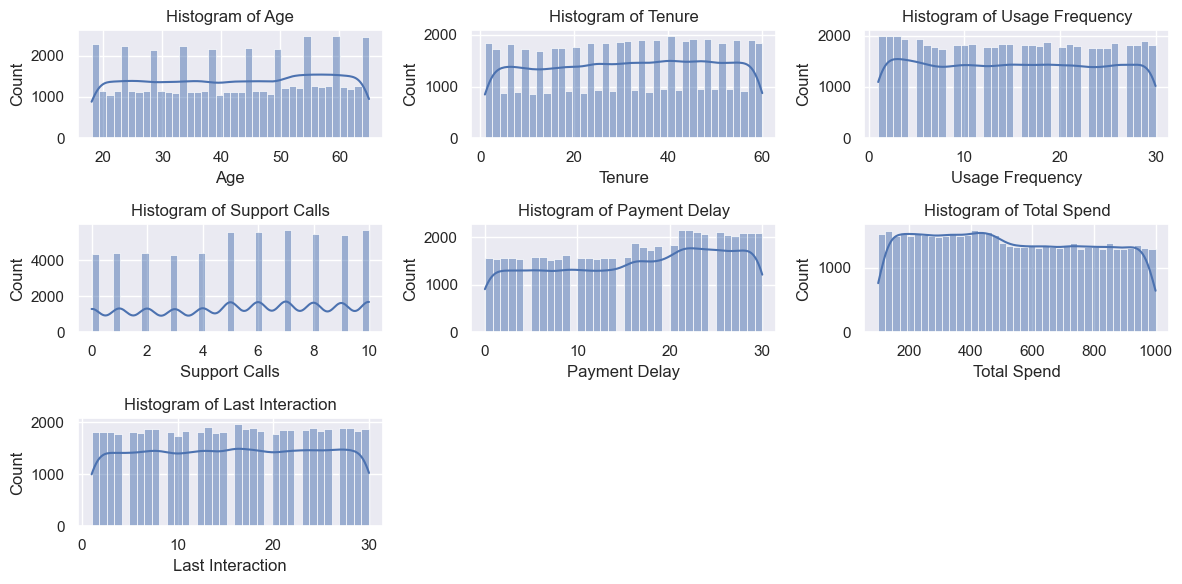

In [61]:
# Plot numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(edanum_col):
    '''
    Loop function to plot the distribution of numerical column in dataframe
    '''
    plt.subplot(3, 3, i + 1)
    sns.histplot(model_plus[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Overall, from the numerical feature, it can be concluded that the ***model is better at predicting where support calls is in between 5-10 and payment delay between 20 - 30 days***

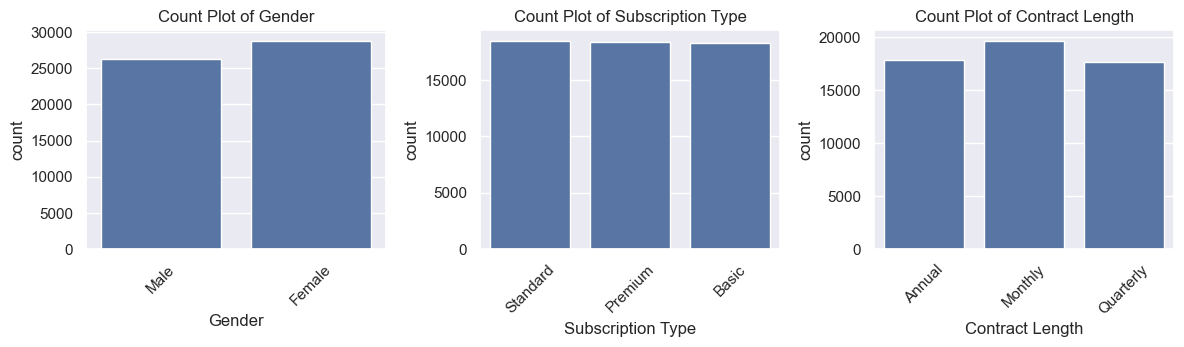

In [62]:
# Plot Categorical Column
plt.figure(figsize=(12, 6))
for i, col in enumerate(edacat_col[:3]):
    '''
    This loop function to show the pattern for categorical column in the dataset
    '''
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=model_plus)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On the other hand, from the categorical features, ***the model is better predicting on female customer and customer which contract length is monthly***. No specific pattern in the subscription type, as this is in line that the subscription type is not selected for modelling during feature engineering (low correlation with target label)

### Model Minus Point

To evaluate the minus point of the model, we need to check on where this model is missing to predict, and since we are focusing on recall metrics (customer is predicted to not churn, when they actually churn). We will evaluate the False Negative to see the minus point on where this model is failure to predict, so our marketing will not be able to reach them

In [63]:
# Create new dataframe for missing prediction (False Negative)
model_minus = df_evaluation[(df_evaluation['Churn'] == 1) & (df_evaluation['Prediction'] == 0)]

model_minus

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Prediction
166636,171447.0,25,Male,4,19,0,8,Basic,Annual,957,18,1,0
163922,168733.0,38,Male,17,7,4,3,Premium,Annual,651,22,1,0
242204,248867.0,24,Male,34,20,3,20,Standard,Quarterly,946,14,1,0
65145,66588.0,21,Female,31,3,3,5,Premium,Annual,784,1,1,0
5330,5339.0,34,Male,36,3,4,3,Standard,Annual,579,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148178,152989.0,21,Female,13,17,3,20,Premium,Quarterly,591,4,1,0
96505,99338.0,19,Male,8,21,4,8,Premium,Quarterly,960,12,1,0
156066,160877.0,34,Male,13,15,4,12,Standard,Annual,799,19,1,0
140173,144888.0,27,Male,41,8,4,5,Standard,Quarterly,767,28,1,0


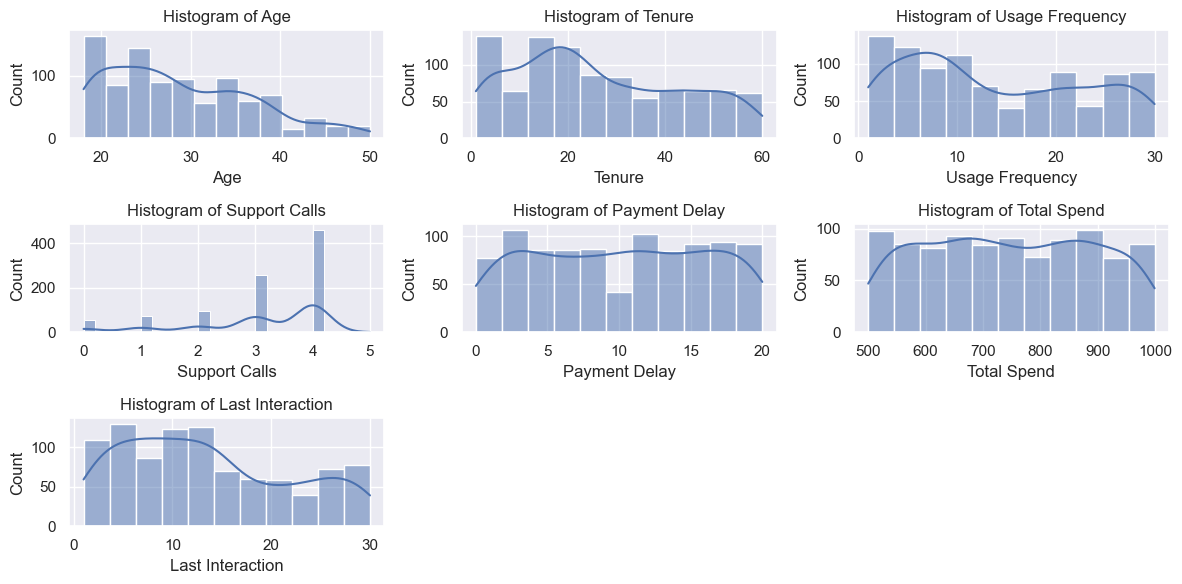

In [64]:
# Plot the numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(edanum_col):
    '''
    Loop function to plot the distribution of numerical column in dataframe
    '''
    plt.subplot(3, 3, i + 1)
    sns.histplot(model_minus[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

For the minus point, the model shows miss prediction where the age is ranging between 20 - 40, last interaction of 0 - 13 days, and support calls made is 3 - 4 

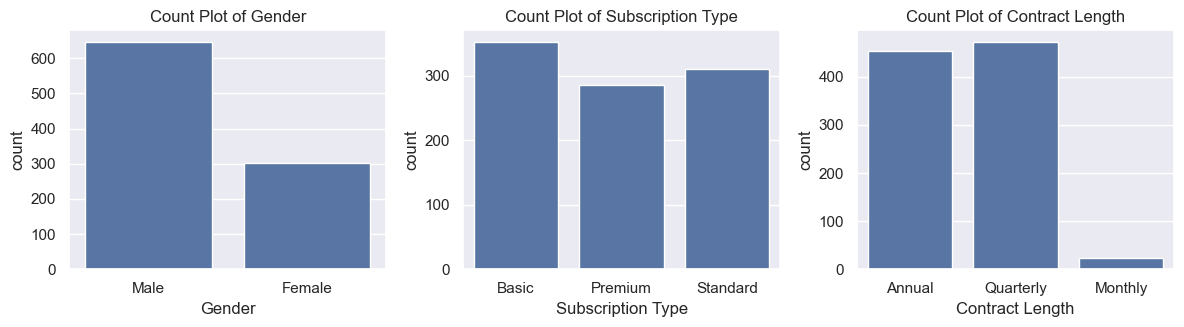

In [65]:
# Plot categorical feature
plt.figure(figsize=(12, 6))
for i, col in enumerate(edacat_col[:3]):
    '''
    This loop function to show the pattern for categorical column in the dataset
    '''
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=model_minus)
    plt.title(f'Count Plot of {col}')
    
plt.tight_layout()
plt.show()

For the categorical features, most of the **miss prediction** from the model is ***when the customer is male and the customers contract length are annual and quarterly***

***OVERALL SUMMARY PLUS AND MINUS OF MODEL EVALUATION***:

| Number      | Plus (Correct to Predict / TP) | Minus (False Negative)|
| ----------- | ----------- |----------- |
| 1   | Support Calls made between 5 - 10        | Age between 20 - 40        |
| 2  | Payment Delay between 20 - 30       | Last Interaction 0 - 13       |
| 3  | Female Customer       | Support Calls made 3 - 4       |
| 4  | Contract Length Monthly      | Customer Male       |
| 5  | -      | Contract Length either annual or quarterly       |

The table above summarize on where the model is correctly predicting or miss to predict.  


In conclusion, the model is well-optimized with the goal of minimizing True Negatives, as evidenced by a recall metric of 0.98 on both the training and test sets, indicating a good fit.

---

# 9. Model Saving

In [66]:
# Save model
with open('model_final.pkl', 'wb') as file_1:
    pickle.dump(rf_randomcv_best, file_1)

---

# 10. Model Inference

Model Inference will be performed in separated notebook

---

# 11. Conclusion

The metric that will be focused for evaluating model is **Recall**. We want the model to **identify** as many customers who are **likely to churn and minimize the number of false negative**. This means that We want to **minimize miss predicting actual churn**. This is important to target the right customer by the marketing division. We dont want to miss any customer that are likely to churn without giving any promotion before they discontinue our services.

***Exploratory Data Analysis:***
- Most of the customers in StreamThis are male
- Within 2 categorize of total spend, most of the customers in high spender category are male customers
- Female customers are more likely to churn compared with male customers
- Majority of customers that is subscribing to StreamThis are in the age between 40 - 50 years old
- On average, the customers are using the platform 15 times per month
- Customers who delayed payment more than 20 days have less tendency to churn

***Based on what we have done in this notebook, it can be concluded that:***
1. Features used for modelling includes Support Calls, Total Spend, Payment Delay, Age, Gender, Contract Length and Last Interaction
2. Most of the data distribution within the features is normally distrubuted
3. Based on cross validation from 5 models, the best model with default hyperparameter is random forest model
4. Tuning for random forest is using randomsearch with n_iter = 50
5. Further tuning hyperparameter of random forest model improve the model to be more good fit and faster loading time with recall score of 0.98 in both train-set and test-set data

***Model Evaluation:***  
  
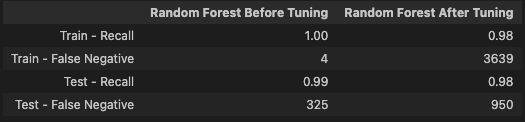

Tuning of the model resulting in a more good fit with no variance between train-set and test-set. Additionally, the tuned model processing time is faster compared with default parameter

Following further analysis on plus and minus point of the tuned model:

| Number      | Plus (Correct to Predict / TP) | Minus (False Negative)|
| ----------- | ----------- |----------- |
| 1   | Support Calls made between 5 - 10        | Age between 20 - 40        |
| 2  | Payment Delay between 20 - 30       | Last Interaction 0 - 13       |
| 3  | Female Customer       | Support Calls made 3 - 4       |
| 4  | Contract Length Monthly      | Customer Male       |
| 5  | -      | Contract Length either annual or quarterly       |

Above table are the summary on where the model is predicting the churn likelihood correct and where the model is miss to predict.  
  
In conclusion, the model is well-optimized with the goal of minimizing True Negatives, as evidenced by a recall metric of 0.98 on both the training and test sets, indicating a good fit.


***Business Recommendation:***  
  
As the model is well predicting the likelihood to churn by the customers behaviour with high recall score. The business recommendation for the marketing team are in the following:
- Approach the customer that is predicted to churn
- Generate discount / promo package bundling to deliver to those predicted customers
- Maintain the existing customer with separate promo than predicted churn customer

***Further Improvement:***
- Different method of feature selection for modelling
- Different method of column transformer (scaling and encoding)
- Further Hyperparameter tuning with higher range
- Hyperparameter tuning for all 5 models

---

# 12. Conceptual Problems

***1. Background of bagging and how it works***  

- As one of the ensemble learning to reduce variance (Bootstrap Aggregating) and prevent overfit. Bagging will use random sampling of data in the training set and will perform trial and error in the training process.   
Steps of bagging:  
A. Sampling = Sampling random data for training  
B. Training  
C. Aggregating the prediction  

- The benefit for bagging is to prevent overfitting by reducing variance, improves stability and boosts performance metrics

***2. Difference of algorithm workflow between random forest and one of the boosting method chosen?***  
- While random forest / bagging method is by random sampling inside the train data, Boosting (AdaBoost) method is by correcting error made in the previous model and create weighted training data to correct error from previous model.

**Steps of boosting:**
- Initialize weights
- Train weak learner 
- Calculate the error = calculate the error from week learner
- Update weights = increase the weight that is misclassified
- Combine learner = compute based on error rate
- Iterate = repeat the process and update weights
- Generate final model

**Key Differences:**
- Bagging used random sample in feature selection, where boosting use weighted training data and correcting error
  
***3. What is cross validation and why it is used in this project?***  
- Cross validation is used by using data from training set for test validation. It create partition based on the specified folds and evaluate the model performance. Cross validation is done to evaluate model performance without leaking the test-set and making sure that the model will work well in the unseen data (test-set)
- Cross validation will calculate the model performance by training over the specified folds. Best model after cross validation is when the aggregate mean of metrics is the highest